In [1]:
f = open('input-18.txt','r')
lines = f.readlines()
f.close()

In [18]:
from collections import defaultdict
grid = defaultdict(list)
len(lines)
key=dict()
door=dict()
for y, l in enumerate(lines):
    for x,n in enumerate(l.replace('\n','')):
        if n == '@':
            start = (x,y)
            grid[y].append('.')
        elif n =='#' or n == '.':
            grid[y].append(n)
        else:
            if n.islower():
                key[n] = (x,y)
            if n.isupper():
                door[n] = (x,y)
                
            grid[y].append('.')


In [19]:
key

{'a': (17, 1),
 'e': (35, 1),
 't': (55, 3),
 'q': (3, 5),
 'm': (75, 7),
 'h': (33, 9),
 'w': (1, 13),
 'y': (17, 21),
 'o': (1, 35),
 'u': (51, 41),
 'r': (59, 43),
 'b': (65, 45),
 'c': (79, 45),
 'p': (1, 47),
 'x': (11, 47),
 'z': (7, 61),
 'j': (45, 65),
 'd': (59, 65),
 'n': (13, 69),
 'i': (79, 73),
 'f': (49, 75),
 'k': (31, 77),
 's': (43, 79),
 'g': (51, 79),
 'v': (63, 79),
 'l': (79, 79)}

In [9]:
lines

['#################################################################################\n',
 '#...#.......#....a..#...........#..e....#.....#...#...#...........#.............#\n',
 '#.#.#.#####.#.#####.#.#######.###.###.#.#.###.#.#.###.#.#########.#.###.#######.#\n',
 '#.#.#.#.#...#.#.K...#...#...#.....#.#.#.#.#.....#.#...#t......#...#.#...#.......#\n',
 '#.###B#.#.#.#.#.#######.###.#######.#.###.#######.#.#########.#.#####.###.#######\n',
 '#.#q..#.#.#.#.#...#.....#...#.......#...#...#.#...#.........#.#.......#.#.#.....#\n',
 '#.#.###.#.#.#.###.#.#####.#.#.#####.###.###.#.#.#####.#######.#########.#.###.#.#\n',
 '#...#...#.#.#...#.#.......#...#.....#...#...#.........#.....#.......#.#...#m..#.#\n',
 '#.#####.#.#####.#.#######.#########.#.###F#############.###.###.###.#.#.###.#####\n',
 '#...#...#.......#.......#.#......h#.#...#.#.....#.......#.....#.#...#.#.#.......#\n',
 '###.#.###########.#####.#.#.#####.#####.#.#.###.#.#####.#####.#.#.###G#.###.###.#\n',
 '#.#.#.......#...#...#...#.#...

In [23]:
#should be a blank map
for m in grid.keys():
    print(''.join(grid[m]))

#################################################################################
#...#.......#.......#...........#.......#.....#...#...#...........#.............#
#.#.#.#####.#.#####.#.#######.###.###.#.#.###.#.#.###.#.#########.#.###.#######.#
#.#.#.#.#...#.#.....#...#...#.....#.#.#.#.#.....#.#...#.......#...#.#...#.......#
#.###.#.#.#.#.#.#######.###.#######.#.###.#######.#.#########.#.#####.###.#######
#.#...#.#.#.#.#...#.....#...#.......#...#...#.#...#.........#.#.......#.#.#.....#
#.#.###.#.#.#.###.#.#####.#.#.#####.###.###.#.#.#####.#######.#########.#.###.#.#
#...#...#.#.#...#.#.......#...#.....#...#...#.........#.....#.......#.#...#...#.#
#.#####.#.#####.#.#######.#########.#.###.#############.###.###.###.#.#.###.#####
#...#...#.......#.......#.#.......#.#...#.#.....#.......#.....#.#...#.#.#.......#
###.#.###########.#####.#.#.#####.#####.#.#.###.#.#####.#####.#.#.###.#.###.###.#
#.#.#.......#...#...#...#.#.....#.#.....#.#...#.#.....#.#...#.#.#.#...#...#...#.#
#.#.#####.###.#.

In [20]:
start

(40, 40)

In [25]:
#number of steps between two points in this maze.
import networkx as nx

graph = nx.Graph()

for y,m in enumerate(grid.keys()):
    for x,tile in enumerate(grid[m]):
        if tile == '.':
            if grid[m][x-1] == '.':
                graph.add_edge((x,y), (x-1,y))
            if grid[m][x+1] == '.':
                graph.add_edge((x,y), (x+1,y))
            if grid[m+1][x] == '.':
                graph.add_edge((x,y), (x,y+1))
            if grid[m-1][x] == '.':
                graph.add_edge((x,y), (x,y-1))

    

In [30]:
len(grid[0])

81

In [43]:
import numpy as np
arr_grid = np.zeros((81,81))
for y,m in enumerate(grid.keys()):
    for x,tile in enumerate(grid[m]):
        if tile =='.':
            arr_grid[y,x] = 2
        if tile =='#':
            arr_grid[y,x] = 1


In [44]:
start_to_a = nx.shortest_path(graph, start, key['a'])

In [48]:
start

(40, 40)

In [ ]:
# from the start point, compute the short key, then door combo.
mystart = [40,40]
nx.shortest_path(graph, mystart, key[k])
mystart = key[k]
nx.shortest_path(graph, mystart, door[k.upper()])



In [104]:
import copy

In [179]:


#distance to possible keys, some of these are not valid due to doors. 
kind = 'closest'
def simulate(kind='random'):
    route = []
    start = (40,40)
    simkeys = copy.deepcopy(key)
    simdoors = copy.deepcopy(door)


    total_dist=0
    while True:
        keybag = set()
        doorunlocked = []

        path = dict()
        dist = dict()
        for k in simkeys.keys():
            doorblocked=False
            path[k]=nx.shortest_path(graph, start, simkeys[k])

            for dkey,d in simdoors.items():
                if d in path[k] and dkey not in keybag:
                    doorblocked = True
                    break

            if not doorblocked:
                dist[k] = len(path[k])


        #sort by closest:
        if kind == 'closest':
            choice = list({k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}.keys())[0]

        #randomally sorted
        if kind == 'random':
            choice = np.random.choice(list(dist.keys()))
            
        if kind == 'semirandom':
            tmp = np.random.rand()
            
            if tmp >0.1:
                limit = min(3,len(list(dist.keys())))
                clist = list({k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}.keys())[0:limit]
                choice = np.random.choice(clist)
            else:
                choice = list({k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}.keys())[0]


        start = simkeys[choice]
        keybag.add(choice)
        route.append(choice)
        del simkeys[choice]
        del simdoors[choice.upper()]

        total_dist+=dist[choice]

        if len(list(simkeys.keys())) == 0:
            break
        #print('going to :',choice)
    #print(total_dist)
    return total_dist,route

In [184]:
for g in graph.nodes:
    print(g)
    break

(1, 1)


In [180]:
bestresult,mybroute = simulate(kind='semirandom')

bestresult

(59, 43)
(45, 65)
(33, 9)
(17, 21)
(35, 1)
(49, 75)
(43, 79)
(75, 7)
(55, 3)
(51, 79)
(51, 41)
(31, 77)
(65, 45)
(17, 1)
(3, 5)
(1, 13)
(79, 73)
(11, 47)
(13, 69)
(79, 45)
(1, 35)
(63, 79)
(7, 61)
(1, 47)
(79, 79)
(59, 65)


6574

In [176]:
bestresult = simulate(kind='closest')

bestresult

(5342,
 ['u',
  'r',
  'j',
  'f',
  'h',
  'e',
  'y',
  'g',
  's',
  'm',
  't',
  'k',
  'a',
  'b',
  'c',
  'q',
  'w',
  'o',
  'i',
  'l',
  'x',
  'z',
  'n',
  'v',
  'd',
  'p'])

In [177]:
bestresult = 4250
bestresult = 4346
bestresult = 7914
import progressbar

for i in progressbar.progressbar(range(0,500)):
    result,broute = simulate(kind='semirandom')
    if result < bestresult:
        bestresult = result
        bestroute = broute
        print(bestresult)

  0% (1 of 500) |                        | Elapsed Time: 0:00:00 ETA:   0:02:36

5546


  1% (6 of 500) |                        | Elapsed Time: 0:00:01 ETA:   0:02:22

5190


 22% (114 of 500) |#####                 | Elapsed Time: 0:00:32 ETA:   0:01:52

5174


 23% (119 of 500) |#####                 | Elapsed Time: 0:00:34 ETA:   0:01:52

5010


 78% (394 of 500) |#################     | Elapsed Time: 0:01:54 ETA:   0:00:30

4930


100% (500 of 500) |######################| Elapsed Time: 0:02:25 Time:  0:02:25


In [172]:
''.join(bestroute)

'jfruhtbcyegsmkqwoaizxndlvp'

In [173]:
''.join(mybroute)

'ujfryhtesmgkcbqwaixzolnvdp'

In [45]:
start_to_a

[(40, 40),
 (40, 39),
 (39, 39),
 (39, 38),
 (39, 37),
 (39, 36),
 (39, 35),
 (39, 34),
 (39, 33),
 (39, 32),
 (39, 31),
 (39, 30),
 (39, 29),
 (38, 29),
 (37, 29),
 (37, 28),
 (37, 27),
 (38, 27),
 (39, 27),
 (39, 26),
 (39, 25),
 (39, 24),
 (39, 23),
 (38, 23),
 (37, 23),
 (37, 24),
 (37, 25),
 (36, 25),
 (35, 25),
 (35, 24),
 (35, 23),
 (35, 22),
 (35, 21),
 (35, 20),
 (35, 19),
 (34, 19),
 (33, 19),
 (33, 18),
 (33, 17),
 (33, 16),
 (33, 15),
 (32, 15),
 (31, 15),
 (31, 14),
 (31, 13),
 (31, 12),
 (31, 11),
 (30, 11),
 (29, 11),
 (28, 11),
 (27, 11),
 (27, 10),
 (27, 9),
 (28, 9),
 (29, 9),
 (30, 9),
 (31, 9),
 (32, 9),
 (33, 9),
 (33, 10),
 (33, 11),
 (33, 12),
 (33, 13),
 (34, 13),
 (35, 13),
 (35, 12),
 (35, 11),
 (36, 11),
 (37, 11),
 (38, 11),
 (39, 11),
 (39, 10),
 (39, 9),
 (38, 9),
 (37, 9),
 (37, 8),
 (37, 7),
 (38, 7),
 (39, 7),
 (39, 6),
 (39, 5),
 (38, 5),
 (37, 5),
 (37, 4),
 (37, 3),
 (37, 2),
 (37, 1),
 (36, 1),
 (35, 1),
 (34, 1),
 (33, 1),
 (33, 2),
 (33, 3),
 (32,

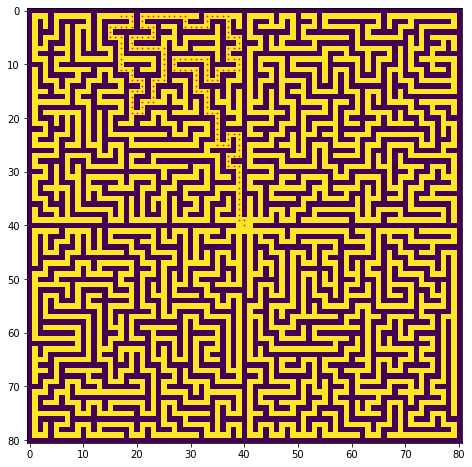

In [47]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8))
plt.imshow(arr_grid)
for x,y in start_to_a:
    plt.scatter(x,y,c='r',s=0.5)

In [98]:
set(key.keys())

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [198]:


#distance to possible keys, some of these are not valid due to doors. 
kind = 'closest'
def simulate_for_robots(kind='random'):
    route = []
    starts = [(39,39),(41,41),(41,39),(39,41)]
    simkeys = copy.deepcopy(key)
    simdoors = copy.deepcopy(door)
    run = True

    total_dist=0
    while True and run:
        keybag = set()
        doorunlocked = []

        for rid,rstarts in enumerate(starts):
            if len(list(simkeys.keys())) == 0:
                run=False
                break

            path = dict()
            dist = dict()
            for k in simkeys.keys():
                doorblocked=False
                path[k]=nx.shortest_path(graph, rstarts, simkeys[k])

                for dkey,d in simdoors.items():
                    if d in path[k] and dkey not in keybag:
                        doorblocked = True
                        break

                if not doorblocked:
                    dist[k] = len(path[k])


            #sort by closest:
            if kind == 'closest':
                tmp = np.random.rand()
                if tmp > 0.5:
                    choice = list({k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}.keys())[0]
                else: 
                    choice = None


            #randomally sorted
            if kind == 'random':
                choice = np.random.choice(list(dist.keys()))

            if kind == 'semirandom':
                tmp = np.random.rand()

                if tmp >0.5:
                    limit = min(3,len(list(dist.keys())))
                    clist = list({k: v for k, v in sorted(dist.items(), key=lambda item: item[1])}.keys())[0:limit]
                    choice = np.random.choice(clist)
                else:
                    choice = None

            if choice != None:
                starts[rid] = simkeys[choice]
                keybag.add(choice)
                route.append(choice)
                del simkeys[choice]
                del simdoors[choice.upper()]

                total_dist+=dist[choice]
            
            if len(list(simkeys.keys())) == 0:
                run=False
                break
        #print('going to :',choice)
    #print(total_dist)
    return total_dist,route

simulate_for_robots('semirandom')

(5374,
 ['r',
  'j',
  'u',
  'e',
  'f',
  'y',
  'h',
  'g',
  't',
  'b',
  's',
  'm',
  'k',
  'a',
  'w',
  'z',
  'i',
  'c',
  'x',
  'q',
  'n',
  'o',
  'd',
  'v',
  'l',
  'p'])

In [ ]:
bestresult = 4790
bestresult = 2500
#bestresult = 1640

import progressbar


for i in progressbar.progressbar(range(0,1500)):
    result,broute = simulate_for_robots(kind='random')
    if result < bestresult:
        bestresult = result
        bestroute = broute
        print(bestresult)

 27% (406 of 1500) |#####                | Elapsed Time: 0:01:43 ETA:   0:04:37

In [201]:

simulate_for_robots('closest')

(5160,
 ['u',
  'r',
  'j',
  'h',
  'f',
  'e',
  'y',
  'g',
  's',
  'm',
  'b',
  'k',
  't',
  'a',
  'q',
  'c',
  'w',
  'o',
  'i',
  'l',
  'x',
  'v',
  'z',
  'd',
  'p',
  'n'])